<a href="https://colab.research.google.com/github/AdenijiAdewaleO/DataAnalysisPortfolio/blob/main/Lab0_AdewaleAdeniji.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **GOLDEN GLOBE AWARDS ANALYSIS**

## 1. DATA LOADING AND CLEANING

In [1]:
# Import necessary libraries for data cleaning and exploration

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math

In [2]:
# Load data from google drive
df = pd.read_csv('Data/golden_globe_awards.csv')
df.head(10)

,year_film,year_award,ceremony,category,nominee,film,win
0,1943,1944,1,Best Performance by an Actress in a Supporting...,Katina Paxinou,For Whom The Bell Tolls,True
1,1943,1944,1,Best Performance by an Actor in a Supporting R...,Akim Tamiroff,For Whom The Bell Tolls,True
2,1943,1944,1,Best Director - Motion Picture,Henry King,The Song Of Bernadette,True
3,1943,1944,1,Picture,The Song Of Bernadette,NaN,True
4,1943,1944,1,Actress In A Leading Role,Jennifer Jones,The Song Of Bernadette,True
5,1943,1944,1,Actor In A Leading Role,Paul Lukas,Watch On The Rhine,True
6,1944,1945,2,Best Performance by an Actress in a Supporting...,Agnes Moorehead,Mrs. Parkington,True
7,1944,1945,2,Best Performance by an Actor in a Supporting R...,Barry Fitzgerald,Going My Way,True
8,1944,1945,2,Best Director - Motion Picture,Leo McCarey,Going My Way,True
9,1944,1945,2,Picture,Going My Way,NaN,True


In [3]:
# Check for null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7991 entries, 0 to 7990
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   year_film   7991 non-null   int64 
 1   year_award  7991 non-null   int64 
 2   ceremony    7991 non-null   int64 
 3   category    7991 non-null   object
 4   nominee     7991 non-null   object
 5   film        6191 non-null   object
 6   win         7991 non-null   bool  
dtypes: bool(1), int64(3), object(3)
memory usage: 382.5+ KB


There appears to be null values in the 'film' field. However, we will ignore this at the moment and only remove these null records if our analysis involves this field.

## 2. Exploratory Data Analysis


In [5]:
# Number of records in the data
print (f'There are {len(df)} datasets in the data')

#Number of award years
num_award_years = df.year_award.unique()
print(f'{len(num_award_years)} years of award are considered in the data from {num_award_years.min()} to {num_award_years.max()}')
df.describe()

There are 7991 datasets in the data
77 years of award are considered in the data from 1944 to 2020


,year_film,year_award,ceremony
count,7991.000000,7991.000000,7991.000000
mean,1987.490552,1988.490552,45.490552
std,18.936258,18.936258,18.936258
min,1943.000000,1944.000000,1.000000
25%,1972.000000,1973.000000,30.000000
50%,1988.000000,1989.000000,46.000000
75%,2004.000000,2005.000000,62.000000
max,2019.000000,2020.000000,77.000000


<__array_function__ internals>:200: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


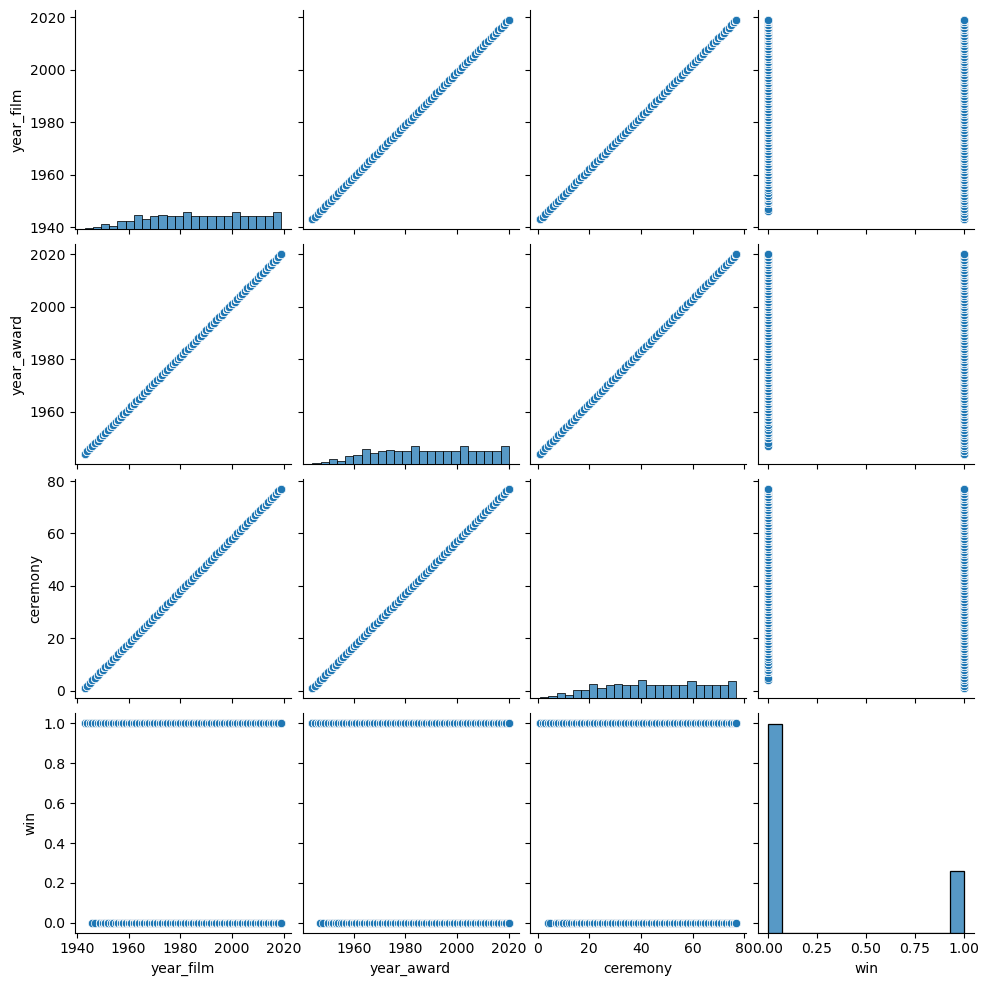

In [6]:
sns.pairplot(df)


From the pairplot above, we see that the year_film, year_award, and ceremony essentially represent the same thing. This is why the correlation between these three variables is 100%.

## 3. IDENTIFYING AN INTERESTING FACT IN THE DATA

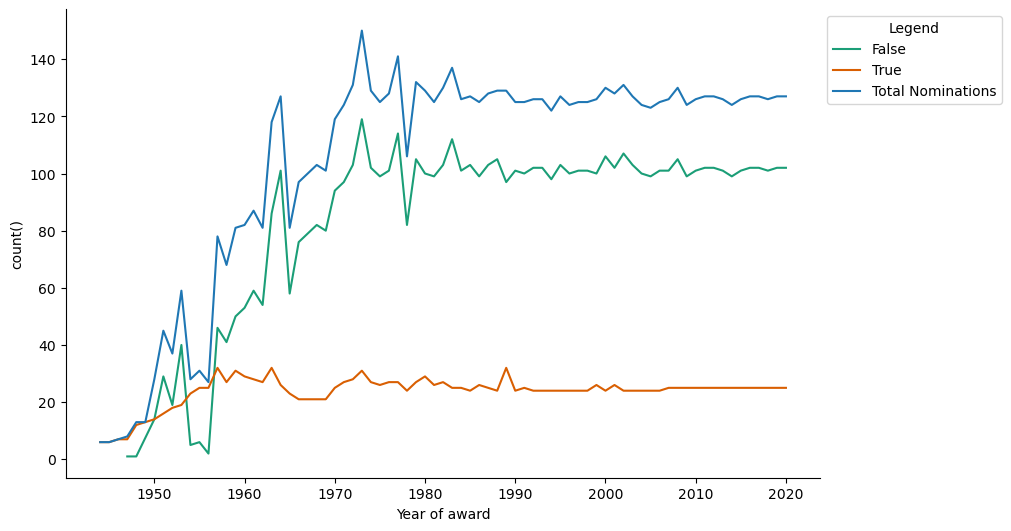

In [7]:
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['year_award']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'year_award'}, axis=1)
              .sort_values('year_award', ascending=True))
  xs = counted['year_award']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df.sort_values('year_award', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('win')):
  _plot_series(series, series_name, i)

total_nominations = df.groupby(['year_award']).agg({'nominee':'count'})
plt.plot(total_nominations, label='Total Nominations')

sns.despine(fig=fig, ax=ax)
plt.xlabel('Year of award')
plt.ylabel('count()')

plt.legend(title='Legend', loc='upper left', bbox_to_anchor=(1, 1))

## RESULT ANALYSIS

The plot above is a time series chart showing the distribution of wins(True or False) and nominations for all awards over the years. This graph provides insight into the trends and patterns of nominations and wins over the years, allowing us to observe increases, decreases, and fluctuations in recognitions.

At the beginning of the awards, nominations were few and initially, all those nominated won. After the first few years of awards, nominations gradually increased and eventually steadied at about 125 nominations per year.

We can also notice that while majority of nominees were winners at the beginning of the awards, this group became only about 20% of total nominations as the years went by.



